In [1]:
import os,csv,json
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd
import sys

steps:
- import csv
- plot basic info- maybe histograms
- make cut offs
- ideally also visualize

In [4]:
# import csv
csv_file_name = "/home/emilyjanedennis/tscratch/z269/lightsheet/3dunet_output/pooled_cell_measures/z269_cell_measures.csv"

In [5]:
fulldf = pd.read_csv(csv_file_name)
fulldf = fulldf.apply(pd.to_numeric, errors='coerce')
fulldf.keys()

Index(['Unnamed: 0', 'intensity', 'maximum perimeter', 'no_voxels',
       'sphericity', 'val', 'x', 'y', 'z', 'z depth'],
      dtype='object')

In [6]:
df = fulldf[fulldf["z depth"] > 1]
df = df[df["no_voxels"] > 1]
df = df[df["maximum perimeter"] > 1]
df = df[df["intensity"]>0.7]

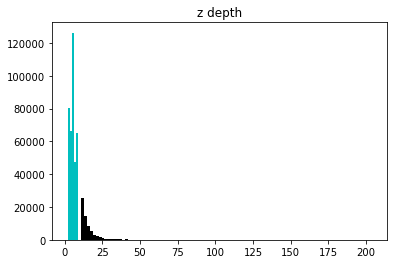

In [7]:
zlim = 10

zdepth = df['z depth']
goodzdepth = zdepth[zdepth < zlim]
badzdepth = zdepth[zdepth > zlim]
plt.figure()
# we are imaging at ~10 micron, expect soma < 150mm2 (generously, also allows for clumps of cells)
#plt.hist([goodzdepth, badzdepth], bins=50)

plt.hist(goodzdepth, bins=5, facecolor='c')
plt.hist(badzdepth, bins=100, facecolor='k')
plt.title('z depth')
plt.show()

In [8]:
slim=0.4

sphericity = pd.to_numeric(df['sphericity'])

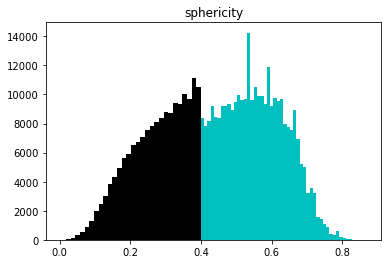

In [9]:
goodsphericity = sphericity[sphericity > slim]
badsphericity = sphericity[sphericity < slim]
# we are imaging at ~10 micron, expect soma < 100mm2 (generously, also allows for clumps of cells)
plt.figure
plt.hist(goodsphericity,bins=50, facecolor='c')
plt.hist(badsphericity,bins=30, facecolor='k')
plt.title('sphericity')
plt.show()

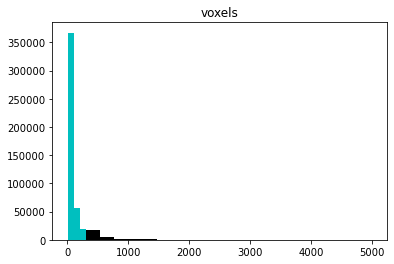

In [10]:
vlim = 300

vox = df['no_voxels']
realvox = vox[vox < 5000]
badvox = realvox[realvox > vlim]
plt.figure()
plt.hist(realvox,bins=50, facecolor='c')
plt.hist(badvox,bins=20, facecolor='k')
plt.title('voxels')
plt.show()


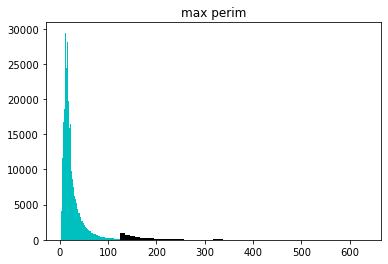

In [11]:
mplim = 125

mp = pd.to_numeric(df['maximum perimeter'])
goodmp = mp[mp < mplim]
badmp = mp[mp > mplim]
plt.figure()
plt.hist(goodmp,bins=100, facecolor='c')
plt.hist(badmp,bins=50, facecolor='k')
plt.title('max perim')
plt.show()

In [12]:
singlezplane = df[df.z < 200]
singlezplane = singlezplane[singlezplane.z > 148]
singlezplane.columns


Index(['Unnamed: 0', 'intensity', 'maximum perimeter', 'no_voxels',
       'sphericity', 'val', 'x', 'y', 'z', 'z depth'],
      dtype='object')

In [13]:
max(df.z)

535

In [14]:
singlezplane.columns = ['num1', 'intensity', 'maximum_perimeter', 'no_voxels', 'sphericity', 'val', 'x', 'y', 'z', 'z_depth']

singlez_z = singlezplane[singlezplane.z_depth > zlim]
singlez_v = singlez_z[singlez_z.no_voxels > vlim]
singlez_mp = singlez_v[singlez_v.maximum_perimeter > mplim]
singlez_s = singlez_mp[singlez_mp.sphericity < slim]

sub = singlezplane[singlezplane.z_depth < zlim]
sub = sub[sub.no_voxels < vlim]
sub = sub[sub.maximum_perimeter < mplim]
sub = sub[sub.sphericity > slim]

<function matplotlib.pyplot.show(*args, **kw)>

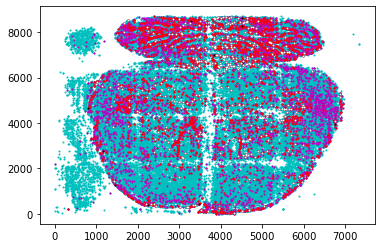

In [15]:
plt.figure
plt.scatter(singlezplane.x,singlezplane.y,s=1,facecolor='c')
plt.scatter(singlez_z.x,singlez_z.y,s=1,facecolor='m')
plt.scatter(singlez_v.x,singlez_v.y,s=1,facecolor='r')
plt.scatter(singlez_mp.x,singlez_mp.y,s=1,facecolor='k')
plt.scatter(singlez_s.x,singlez_s.y,s=1,facecolor='w')
plt.show

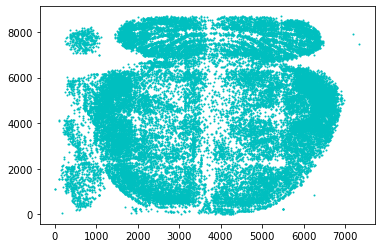

In [16]:
plt.scatter(sub.x,sub.y,s=1,facecolor='c')

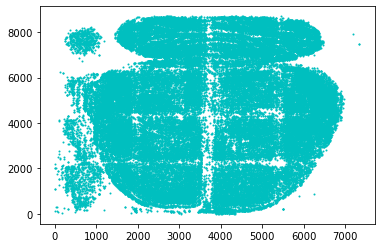

In [17]:
plt.scatter(singlezplane.x,singlezplane.y,s=1,facecolor='c')

In [22]:
# add mask 2447x2900

In [23]:
import SimpleITK as sitk

In [ ]:
# need to have points in mri space so need to transformix points
# which means I need to get points into a transformix-readable format first
# then warp to MRI - try to keep id of points intact
    # this would allow further processing (like slicing by z pln, etc)
    # without additional warp steps
# then use the transformed points + mask/segmentations
# this could probably all be done in ng as well

In [21]:
subdf = df[['x','y','z']]
npdf = subdf.to_numpy()

In [22]:
np.save("/home/emilyjanedennis/Desktop/testnpdf.npy",npdf)

In [23]:
#transform_points(src, dst, transformfiles, resample_points=False):
sys.path.append("/home/emilyjanedennis/Desktop/GitHub/rat_BrainPipe/")

from tools.analysis.transform_points import transform_points

transformfiles=["/home/emilyjanedennis/Desktop/brains/z269/TransformParameters.0.txt",
               "/home/emilyjanedennis/Desktop/brains/z269/TransformParameters.1.txt",
               "/home/emilyjanedennis/Desktop/brains/z269/TransformParameters.2.txt",
               "/home/emilyjanedennis/Desktop/brains/z269/TransformParameters.3.txt"]

# optional resampling between fullsized and input to elastix
original_dims = (583, 8701, 7341)  # sagittal
resample_dims = (591, 1006, 392)  # sagittal
resample_points = [original_dims, resample_dims]

In [24]:
transform_points("/home/emilyjanedennis/Desktop/testnpdf.npy","/home/emilyjanedennis/Desktop/test/",transformfiles,resample_points)

This function assumes ZYX centers...
writing centers to transfomix input points text file......done writing centers

***********Starting Transformix***********b'\ntransformix is started at Sun Sep 13 11:05:46 2020.\n\nwhich transformix:   transformix\ntransformix runs at: emilyjanedennis-System-Product-Name\n  Linux 5.4.0-42-generic (x64), #46-Ubuntu SMP Fri Jul 10 00:24:02 UTC 2020\n  with 128513 MB memory, and 10 cores @ 1200 MHz.\nRunning transformix with parameter file "/home/emilyjanedennis/Desktop/test/order3_TransformParameters.3.txt".\n\nReading the elastix parameters from file ...\n\nInstalling all components.\nInstallingComponents was successful.\n\nELASTIX version: 5.000\nCommand line options from ElastixBase:\n-in       unspecified, so no input image specified\n-out      /home/emilyjanedennis/Desktop/test/\n-threads  unspecified, so all available threads are used\n-tp       /home/emilyjanedennis/Desktop/test/order3_TransformParameters.3.txt\n-def      /home/emilyjanedennis/

In [25]:
transformed = np.load("/home/emilyjanedennis/Desktop/test/posttransformed_zyx_voxels.npy")

In [164]:
import tifffile as tif
edgevent = tif.imread("/home/emilyjanedennis/Desktop/for_registration_to_lightsheet/tiffs/WHD_annotation_117um_edge_194um_vent_erosion.tif")

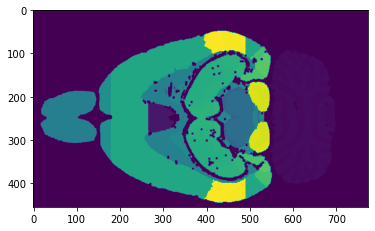

In [166]:
plt.imshow(edgevent[:,:,100])

In [167]:
transformed[1:10,:]

array([[   8.075935,  373.430666,  279.700408],
       [   8.207305,  377.057928,  279.880635],
       [   8.200823,  380.552066,  281.66377 ],
       [   9.528341,  411.563468,  281.467851],
       [  52.882277, 1341.299352,  646.24805 ],
       [ -14.271376, -258.450058,  445.915958],
       [  18.642494,  421.001847,  517.883377],
       [  19.278236,  438.043545,  518.533842],
       [  19.631426,  447.511155,  518.895213]])

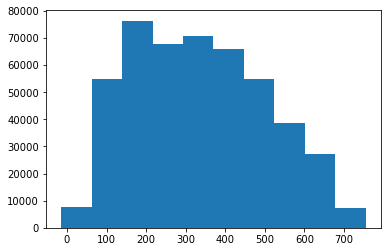

In [168]:
plt.hist(transformed[:,0])
plt.show()

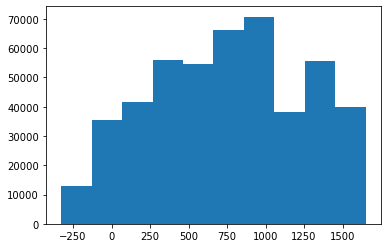

In [169]:
plt.hist(transformed[:,1])
plt.show()

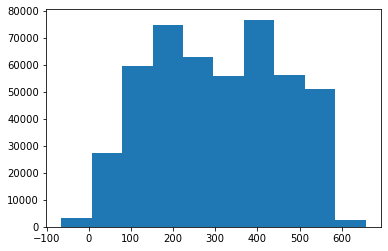

In [170]:
plt.hist(transformed[:,2])
plt.show()

In [171]:
t500 = transformed[transformed[:,0]>499.9]
t500=t500[t500[:,0]<501]

In [172]:
np.shape(t500)

(727, 3)

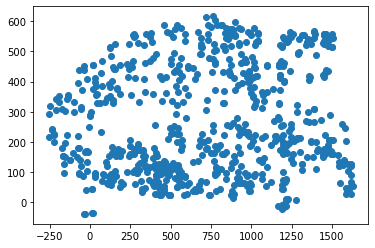

In [173]:
plt.scatter(t500[:,1],t500[:,2])

In [174]:
#edgevent x y z
#transformed z x y
floort = np.floor(transformed)

In [175]:
np.shape(floort)

(471063, 3)

In [176]:
np.shape(edgevent)

(455, 774, 302)

In [177]:
masked_data = np.zeros((455,774,302))

In [178]:
floorto=floort


In [179]:
floort=floort[floort[:,0]<301]
floort=floort[floort[:,1]<454]
floort=floort[floort[:,2]<773]
floort=floort[floort[:,0]>0]
floort=floort[floort[:,1]>0]
floort=floort[floort[:,2]>0]

In [180]:
# for each row in transformed, place the value in edgevent in the correct space
for i in np.arange(0,np.shape(floort)[0]-1):
    z,x,y=floort[i,:]
    z=z.astype(int)
    y=y.astype(int)
    x=x.astype(int)
    if edgevent[x,y,z]>0:
        masked_data[x,y,z] = edgevent[x,y,z]

In [181]:
tif.imsave("/home/emilyjanedennis/Desktop/masked_count_100wvent.tif",masked_data)

In [182]:
test=masked_data
np.shape(test)

(455, 774, 302)

In [183]:
test=test.reshape(455*774*302,1)
np.shape(test)

(106355340, 1)

In [184]:
testing = test[test>0]
maxtest = max(testing)
maxtest

164.0

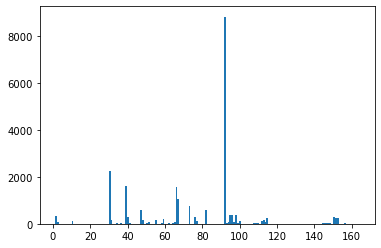

In [185]:
histinfo =plt.hist(testing,bins=maxtest.astype(int))
plt.show()

In [186]:
lab=pd.read_csv("/home/emilyjanedennis/Desktop/for_registration_to_lightsheet/labels/labels_v3.csv")

In [187]:
lab.insert(3,'histinfo',0)

In [188]:
lab

,Unnamed: 0,name,id,histinfo
0,0,Clear Label,0,0
1,1,descending corticofugal pathways,1,0
2,2,substantia nigra,2,0
3,3,subthalamic nucleus,3,0
4,4,molecular layer of the cerebellum,4,0
...,...,...,...,...
114,114,"ventral cochlear nucleus, posterior part",159,0
115,115,"ventral cochlear nucleus, cap area",160,0
116,116,spiral ganglion,162,0
117,117,nucleus sagulum,163,0


In [189]:
for i in np.arange(1,maxtest.astype(int)):
    lab.histinfo[lab.id==i]=histinfo[0][i]

<ipython-input-189-a25e2ffd2f61>:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  lab.histinfo[lab.id==i]=histinfo[0][i]
<ipython-input-189-a25e2ffd2f61>:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  lab.histinfo[lab.id==i]=histinfo[0][i]


In [190]:
lab

,Unnamed: 0,name,id,histinfo
0,0,Clear Label,0,0
1,1,descending corticofugal pathways,1,94
2,2,substantia nigra,2,0
3,3,subthalamic nucleus,3,0
4,4,molecular layer of the cerebellum,4,0
...,...,...,...,...
114,114,"ventral cochlear nucleus, posterior part",159,0
115,115,"ventral cochlear nucleus, cap area",160,0
116,116,spiral ganglion,162,1
117,117,nucleus sagulum,163,8


In [191]:
histinfo

(array([3.340e+02, 9.400e+01, 0.000e+00, 0.000e+00, 0.000e+00, 0.000e+00,
        0.000e+00, 0.000e+00, 0.000e+00, 9.900e+01, 0.000e+00, 0.000e+00,
        0.000e+00, 0.000e+00, 0.000e+00, 0.000e+00, 0.000e+00, 0.000e+00,
        0.000e+00, 0.000e+00, 0.000e+00, 0.000e+00, 0.000e+00, 0.000e+00,
        0.000e+00, 0.000e+00, 0.000e+00, 0.000e+00, 0.000e+00, 2.249e+03,
        1.560e+02, 9.000e+00, 0.000e+00, 1.600e+01, 0.000e+00, 2.800e+01,
        8.000e+00, 6.000e+00, 1.614e+03, 2.760e+02, 2.500e+01, 9.000e+00,
        1.000e+00, 0.000e+00, 0.000e+00, 2.000e+00, 5.690e+02, 1.530e+02,
        0.000e+00, 1.800e+01, 7.500e+01, 1.100e+01, 1.000e+00, 0.000e+00,
        1.560e+02, 0.000e+00, 0.000e+00, 3.600e+01, 1.870e+02, 9.000e+00,
        6.000e+00, 1.800e+01, 0.000e+00, 1.500e+01, 6.300e+01, 1.555e+03,
        1.066e+03, 1.000e+00, 0.000e+00, 0.000e+00, 1.200e+01, 0.000e+00,
        7.680e+02, 0.000e+00, 0.000e+00, 2.740e+02, 1.160e+02, 1.000e+00,
        1.100e+01, 0.000e+00, 0.000e+0

In [193]:
lab.to_csv('/home/emilyjanedennis/Desktop/z269_counts_117_19wvent.csv')